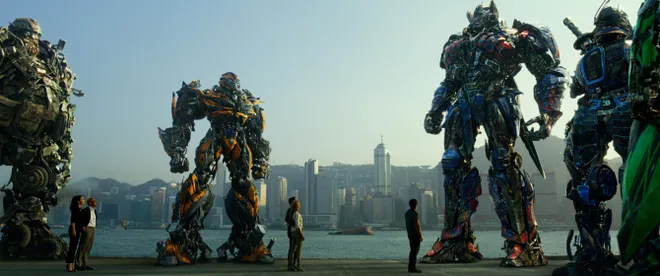


<h2><center>Summary by Hristina Aleksandrova</center></h2>

<container>
    <p>
In 2017 Attention is all you need had made in own revolution with new newral architecture called the Transformer. The paper had been written by Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez,Łukasz Kaiser, Illia Polosukhin.
    </p>
  <p>
In 2020 Google research team propose ETC 'Extended Transformer construction' with key objective to handle langer inputs offten with nasted components. The paper is focused only on the encoder sider side leaving the door open for future development. 
    </p>
</container>

<container>
    <h2>Lets start with the beggining why we need Transformer?</h2>
    <p>
It is all about the attention mechanism. The sequential problems were initally based on Recurrent Neral Networks or RNNS  with encoder-decoder structure. The unhidden truth is that they had a lot of limitations while working with long sequences. These architectures have a great limitation when working with long sequences because of  the memorizing absence. The hidden state in every step in the encoder is associated with a word in the input. After the decoder has access only to the last hidden state and here comes the loss of the information the previous elements. 
    </p>
    <p>
Implementiong attention allows the decoder to look at all the states of the encoder and acces the information from the who sequence. With attention, the decoder can focus on the important elemnts of the input and make a preidiction for the next output. This idea has it own problems too with computational effecienty when dealing with big corpus.
    </p>
    <p>
The Transformer is a model architecture eschewing recurrence and instead relying entirely on an attention mechanism to draw global dependencies between input and output. The Transformer allows for significantly more parallelization and can reach a new state of the art in translation quality.
    </p>
</container>

<h2>How Transformer works?</h2>

![image.png](img1.png)

<container>
    <p>
The figure one from the paper present an encoder model on the left side and the decoder on the right one. Both contains a core block of “an attention and a feed-forward network” repeated N times.
    </p>
    <p>
Simply explained The Transformer model extract features for each word using a <i>self-attention mechanism</i> and makes it decision on the importance of each word. Those features a simply the weighted sum of the activations, which make them more efficient and parallezizable. 
    </p>
</container>

![image.png](img2.png)



<container>
    <h4><center><b>But what is really the Self-attention mechanism?</b></center></h4>
    <p>
Self-attention was proposed by researchers at Google Research and Google Brain. It was proposed due to challenges faced by encoder-decoder in dealing with long sequences. The authors also provide two variants of attention and transformer architecture. This transformer architecture generates the state-of-the-art results on WMT translation task.
    </p>
    <p>
        <center>The Scaled Dot-Product Attention</center>
$$Attention(Q,K,V)=Softmax(\frac{QK^T}{\sqrt{d_k}})V$$
    </p>
    <p>
The first step is multiplying each of the encoder input vectors with three weights matrices $(W(Q), W(K), W(V))$ that are trained during the training process. This matrix multiplication will give  three vectors for each of the input vector: the key vector:$K$, the query vector : $Q$, and the value vector: $V$.
The second step in calculating self-attention is to multiply the Query vector of the current input with the key vectors from other inputs.
In the third step,  the score is devided by square root of dimensions of the key vector $(dk)$. 
In the fourth step, softmax function is applied on all self-attention scores  calculated wrt the query word (here first word).
In the fifth step, the value vector is multiplied on the vectorcalculated in the previous step.
In the final step, the weighted value vectors are sum up from the previous step, this give the self-attention output for the given word.[1]
    </p>
    <p>
Simply explained  sequence of vectors goes in, and a sequence of vectors comes out both with dimension k. To produce output vector, the self attention operation simply takes a weighted average over all the input vectors, the simplest option is the dot product.
Every input vector is used in three different ways in the self-attention mechanism: the $Q$, the $K$ and the $V$. In every role, it is compared to the other vectors to get its own output Query and Key, and to compute each output vector once the weights have been established -> the Value.       
    </p>
    <p>
The attention scores measure how much focus to place on other places or words of the input sequence w.r.t a word at a certain position. That is, the dot product of the query vector with the key vector of the respective word. After softmax is applyed and mulptiplication by the $V$ matrix.
    </p>
    <p>
        <center>Multi-headed-attention</center>
$$MultiHead(Q,K,V)=concat(head_1,head_2....head_n)W_o where, head_i = Attention(QW_i^q,KW_i^K,VW_i^V)$$
    </p>
     <p>
MultiHead attention takes each word of input sentence and generate the embedding from it.
In this mechanism,h (h = 8) different attention heads are created, each head has different weight matrices (W(Q), W(K), W(V)).
In this step, the input matrix with is multiplied by each of the weight matrices (WQ, WK, WV) to produce the key, value, and query matrices for each attention head.
After comes  the attention mechanism to these query, key, and value matrices, this gives u an output matrix from each attention head.
In this step, are concatenated the output matrix obtained from each attention heads and dot product with the weight WO to generate the output of the multi-headed attention layer.
    </p>
</container>

![image-5.png](img5.png)

 <h5><center><b>Application[2]</b></center></h5> 

<container>
    <h4><center><b>Attention in Transformer architecture</b></center></h4>
    <p>
The transformer architecture uses attention model uses multi-headed attention at three steps:
The first is encoder-decoder attention layers, in this type of layer the queries come from the previous decoder layer while the keys and values come from the encoder output. This allows each position in the decoder to give attention to all the positions of the input sequence.
The second type is the self-attention layer contained in the encoder, this layer receives key, value, and query input from the output of the previous encoder layer. Each position in the encoder can get attention score from every position in the previous encoder layer.
The third type is the self-attention in the decoder, this is similar to self-attention in encoder where all queries, keys, and values come from the previous layer. The self-attention decoder allows each position to attend each position up to and including that position. The future values are masked with (-Inf). This is known as masked-self attention.
    </p>
     <hr>
    <p>
The 3 masks are the following:
   
Encoder mask: It is a padding mask to discard the pad tokens from the attention calculation.
        
Decoder mask 1: this mask is a union of the padding mask and the look ahead mask which will help the causal attention to discard the tokens “in the future”. We take the maximum value between the padding mask and the look ahead one.
        
Decoder mask 2: it is the padding mask and is applied in the encoder-decoder attention layer.
    </p>    
</container>

![image](img6.png)

![image-7.png](img7.png)

 <h3><center><b>Full model application[3]</b></center></h3> 

 <h5><center>Creation a custom loss function to mask the padding tokens</center></h5> 

 <h5><center>Creation of scheduler to vary the learning rate</center></h5>  
 $$l_rate=d_model^{-0.5}\cdot min(step_{num}^{-0.5},step_{num}\cdot warmup_{step}^{-0.5})$$

 <h5><center>The main function</center></h5> 

 <h5><center>Make predictions</center></h5> 

<h2>What`s next : The ETC</h2>

<container>
    <p>
BERT and other transformer variants give very good results for wild range of tasks. But since one of the core gradient self-attention scales quadratically in the input length, the input length is commonly limited by 512 tokens or less. One of the primary objectives of the ETC is to scale transformer input length from 512 to several thousand. The other key objective is to accept richer structure inputs since larger inputs often contains nested components and other potential graphs like relationships.
    </p>
    <p>
There are three key ideas to accomplish the both objectives:
First the paper introduction the global-local attention to scale up input length. Secondly the relative position representation is proposed to encode token relations and rich input structure., to encourage paralyzed token relationships which allow the representation of ordered co-membership .The third idea is to adapt he contrastive predictive coding as a pre-training objective to learn sentence level high rankly.         
    </p>
</container>

![image-10.png](img10.png)

<container>
    <p>
In the unidirectional standard self-attention with quadratic complexity on the left of the figure. One way to reduce complexity is to constrain the attention to be local in the middle figure. But now the distinct tokens cannot interact with each other. In ETC an additional global memory had been introduced, that can attend to every input token and every token can attend the memory. Like this every input token can reach every other input token using the global memory while still maintaining linear complexity.
    </p>
        <p>
For example one of the benefit of ETC is that it can encode more general graph structure, in this work we focus on representing hierarchical structure in NLP tasks, not usually modeled by Transformer models.
    </p>
</container>

![image-15.png](img15.png)

 <h4><center>What is ETC construction?</center></h4> 

<container>
    <p>
ETC replace absolute position encodings with relative position encodings, which provide inforrmation about the relative position of tokens in the input sequence with respect to one another.Relative position encodings are independent of input lenght, so it is easy to adapt a model to a greate input lenghts.
    </p>
    <p>
The paper introduce Gloabl-local attention. ETC receives two separate input sequence: the global input $x^g=(x_1^g,...,x_{n_g}^g)$ and long input $x^l=(x_1^l,...x_{n_l}^l)$. The long input contains the input a standart Transformer will receive,while the global input contains a much small number of auxiliary tokens $(n_g <<n_l)$. After attention is split in four pieces: global-to-global $(g2g)$, global-to-long $(g2l)$, long-to-global $(l2g)$, long-to-long $(l2l)$. The tokens in the global input have unrestricted attention and thus the long input which is restricted can transfer information to each other trough global input tokens. ETC is more computational effective using less memory for very long inputs.
    </p>
</container>

![image-14.png](img14.png)

<container>
     <p>
Givel a global input $x^g=(x_1^g,...,x_{n_g}^g)$ and output $z^g=(x_1^g,...x_{n_g}^g)$ , each $z_j^g \in R^{d_z}$ is calculated as following:
    </p>
    <p>
$$z_j^g=\sum_{j=1}^{n_g}$$
    <hr>
$$a_{ij}^{g2g}=\frac{exp(e_{ij}^{g2g})} {\sum_{l=1}^n exp(e_{}ij)^{g2g}}$$
    <hr>
$$e_{ij}^{g2g}= \frac{x_i^g W^Q(x_j^gW^K + a_{ij}^K)^T}{\sqrt{d_z}}-(1-M_{ij}^{g2g})C$$
    </p>
    <p>
$M^{g2g}$ is a binary attention mask, $W^Q, W^K,W^V$ are learnable weight matrices, and $a_{ij}^K$ are learnable vectors representing the relative position labels, $C$ is a large constant. For the three other pieces attentions is analogous.
    </p>
</container>

<container>
    <h4><center><b>Long inputs and structured inputs</b></center></h4>
    <p>
General way to handle long inputs in ETC is to place the entire sequence of input tokens in long input and them assuming some sort of division into segmenets (sentences) and place one auxiliary token in the global input per segment in the long input.
    </p>
    <p>
With the help og global-lacal attention and relative position labels ETC exploits the relation encode structured inputs.Givel an input $x=(x_1,...,x_n)$ the article referce to the relation existing between the tokens in $x$.
    </p>
    <p>
ETC is particularly well suited to capture hierarchical structure thanks to three mechanisms. First, as originally conceived, the vocabulary of relative position labels is used to represent token relative positions. However, seeing a Transformer as a graph neural network over a graph g (with one vertex per token in x, and edges representing their
relations), the propose to  expand this vocabulary to label some edges with labels for relations such as is-a,
part-of, or others. Second, the division between long and global input induces a natural structure where the global input contains summary tokens of sets of tokens in x (a 2-level hierarchy). Third, if some pairs of tokens should
not have an edge between them, this can be captured with the Mg2g, Mg2l, Ml2g, Ml2l masks.
    </p>
</container>

![img](img11.png)

<container>
    <p>
As visible on the table above ETC performe very well. ETC performe well because it allows lifting weights from existing BERT models, improving results significantly. The key ideas are a new global-local attention mechanism, coupled with relative position encodings.
    </p>
</container>

Source code and pre-trained checkpoints for ETC can be found at http://goo.gle/research-etc-model

<i><b>References:</b></i><br>
<font size =0.5><i>[1]Self -attention in NLP: https://www.geeksforgeeks.org/self-attention-in-nlp/</i></font><br>
<font size =0.5><i>[2]Eduardo M Sala: https://gist.github.com/edumunozsala </i> </i></font><br>